# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

## RESPONSE
1. This paper is about data tidying and tidy datasets which are components of data cleaning. The structure of tidy datasets makes data manipulation, visualization, and analysis easier because only a small set of tools are needed. These advantages are examined throughout the paper in a case study which utilizes a these tools for tidying.
2. The "tidy data standard" is intended to make the initial data cleaning and analysis easier as well as to simplify the development of tools to facilitate these processes.
3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that tidy datasets all have a similar structure just like happy families. However, every messy dataset is messy due to its own unique problems just like how unhappy families are unhappy for their own reasons. The sentence "For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" means that given the context of a dataset, it is generally fairly easy to identify what observations and the variables are because it is clear what the dataset's specific purpose is. However, without the context it is a lot more difficult to define variables and observations since they could provide different insights in different contexts.
4. Wickham defines values as what make up a dataset, usually in the form of numbers or strings. He defines variables as what contains all values that measure the same underlying attribute across units whereas observations contain all values measured on the same unit across attributes.
5. "Tidy Data" is defined as a standard mapping of a dataset to structure where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. The 5 most common problems with messy datasets are when 1) column headers are values rather than variable names 2) multiple variables are stored in one column 3) variables are stored in both rows and columns 4) multiple types of observational units are stored in the same table 5) a single observational unit is stored in multiple tables. The data in Table 4 is messy because the column headers for income are displayed as ranges of values rather than as a variable name for income, making it difficult to understand the data in the table. This can be solved by "melting" the dataset, or "stacking" it where the columns will be turned into rows.
7. Table 11 is messy because the dates for each of the ids in the weather dataset are spread out across over three columns for year, month and day with each day in the month as its own separate column. The element column also is not a variable, but rather just somewhere to store the names of the variables. Table 12 is tidy and molten because the columns for year, month, and day were melted to create a date column. The two variables of tmin and tmax which were under the "element" column were also unstacked, so there is a variable in each column.
8. The "chicken-and-egg" problem with tidy data is that tidy data is only as useful as the tools that work with it, but the tidy tools also depend on the tidy data. Wickham hopes that in the future of data wrangling, people will build upon the tidy framework and develop even better tools and strategies. He also wonders if there are other frameworks that can be developed to aid in other tasks of data cleaning.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total missings: 
 0 



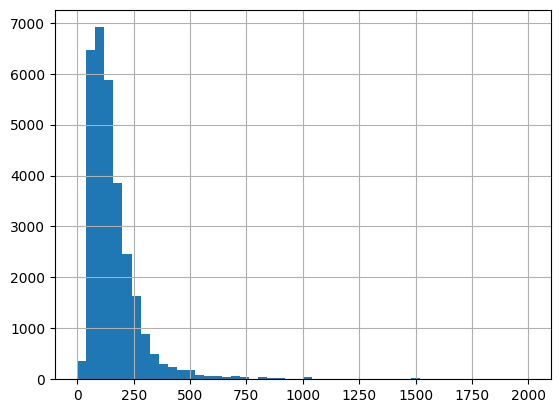

In [ ]:
import numpy as np
import pandas as pd

# Q1 Numerical Variable
airbnb = pd.read_csv("./data/airbnb_hw.csv")

# Before the coercion, we observe that the Price variable is of type object and that there are is a comma separator in the formatting when the price goes over 999 dollars.
# Therefore, I chose to remove the separator to preserve as much data as possible and then coerced the values to be numerics. There were no missing values found under the Price
# variable, so I did not perform any sort of imputation.
print("Before coercion: \n", airbnb["Price"].describe(), "\n")

airbnb["Price"] = airbnb["Price"].str.replace(",", "")
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors='coerce')

airbnb["Price_NaN"] = airbnb["Price"].isnull()

print("After coercion: \n", airbnb["Price"].describe(), "\n")
airbnb["Price"].hist(bins = 50, range=[0, 2000])
print("Total missings: \n", sum(airbnb["Price_NaN"]), "\n")



In [ ]:
# Q2 Categorical Variable
sharks = pd.read_csv("./data/sharks.csv", low_memory = False)

# After observing the unique values under the Type variable, we notice that the missing values are aleady .nan so no actions were taken to replace missing values.
# There was an inconsistency in formatting as seen in "under investigation" and "Sea Disaster" in terms of capitalization, so the cleaning performed was to standardize
# the text formatting to be all lowercase.
print(sharks["Type"].unique(), "\n")
sharks["Type"] = sharks["Type"].str.lower().str.strip()
print(sharks["Type"].value_counts(), "\n")

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

unprovoked             4716
provoked                593
invalid                 552
sea disaster            239
watercraft              142
boat                    109
boating                  92
questionable             10
unconfirmed               1
unverified                1
under investigation       1
boatomg                   1
Name: Type, dtype: int64 



In [ ]:
# Q3 Dummy variable
pretrial = pd.read_csv("./data/VirginiaPretrialData2017.csv", low_memory = False)

print(pretrial["WhetherDefendantWasReleasedPretrial"].unique(), "\n")
pretrial["WhetherDefendantWasReleasedPretrial"] = pretrial["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)
print(pretrial["WhetherDefendantWasReleasedPretrial"].value_counts())

[9 0 1] 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


Before coercion: 
 count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 

Total missings: 
 9053 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent_NaN                                  
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 



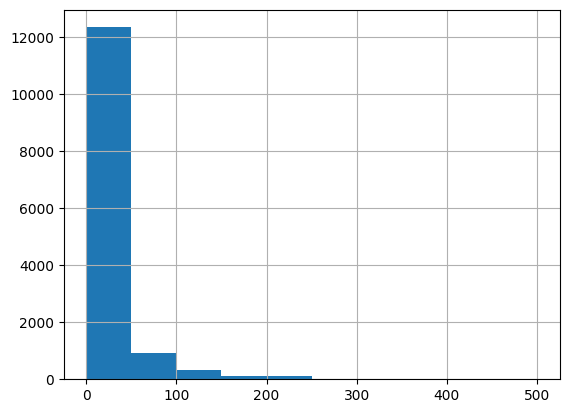

In [ ]:
# Q4 Missing values, not at random

# Before the coercion, we observe that the values under the ImposedSentenceAllChargeInContactEvent variable are floats, so no coercion to numeric needs to be performed.
# When observing the missing values we find that there are 9053 missings. Looking at the relationship between ImposedSentenceAllChargeInContactEvent and
# SentenceTypeAllChargesAtConvictionInContactEvent, we see that only values with a SentenceTypeAllChargesAtConvictionInContactEvent label of 4 (other) and 9 (unknown)
# are missing. Therefore, we replace the missings by these sentence types with nan. We replace with nan rather than 0 because the in the context of this dataset, it is not
# the case that the charges were just not posted.
print("Before coercion: \n", pretrial["ImposedSentenceAllChargeInContactEvent"].describe(), "\n")
pretrial["ImposedSentenceAllChargeInContactEvent_NaN"] = pretrial["ImposedSentenceAllChargeInContactEvent"].isnull()
pretrial["ImposedSentenceAllChargeInContactEvent"].hist(bins = 10, range=[0, 500])
print("Total missings: \n", sum(pretrial["ImposedSentenceAllChargeInContactEvent_NaN"]), "\n")

print(pd.crosstab(pretrial["ImposedSentenceAllChargeInContactEvent_NaN"],pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"]),"\n")

pretrial.loc[pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"] == 4, "ImposedSentenceAllChargeInContactEvent"] = np.nan # Other
pretrial.loc[pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"] == 9, "ImposedSentenceAllChargeInContactEvent"] = np.nan # Unknown

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [10]:
import numpy as np
import pandas as pd

# Part 1
df = pd.read_csv("./data/college_completion.csv")

# Part 2
print("The dimensions of the data are", df.shape, "\n")
print("There are", df.shape[0], "observations in the dataset.\n")
print("These are some of the variables included: \n", df.dtypes, "\n")
# The relevant variables in this problem are level, aid_value, control, and grad_100_value so we will pull these columns and save to another dataframe
college = df[["level", "aid_value", "control", "grad_100_value"]]
college.head()


The dimensions of the data are (3798, 63) 

There are 3798 observations in the dataset.

These are some of the variables included: 
 index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 



,level,aid_value,control,grad_100_value
0,4-year,7142.0,Public,10.0
1,4-year,6088.0,Public,29.4
2,4-year,2540.0,Private not-for-profit,0.0
3,4-year,6647.0,Public,16.5
4,4-year,7256.0,Public,8.8


In [12]:
# Part 3
# Looking at the cross tabulation between control and level, it seems that majority of the private not-for-profit colleges were were 4-year instituions rather than 2-year institutions.
# 2-year and 4-year colleges were more similar in number for private for-profit colleges. Public colleges had more 2-year institutions than 4-year institutions, but the difference gap
# is not as great when compared to private not-for-profit colleges.
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.